In [1]:
import os
import json
# import pandas as pd
import fireducks.pandas as pd
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

IMAGEDIR = r"/scratch/IITB/ai-at-ieor/23m1521/datasets/Vaani/Images" 
DATADIR = r"/scratch/IITB/ai-at-ieor/23m1521/datasets/Vaani/Audios/English"
AUDIO_CSV = r"/home/IITB/ai-at-ieor/23m1521/ashish/MTP/Vaani/Vaani-Audio-Image-English.csv"
METADATA_PATH = r"/home/IITB/ai-at-ieor/23m1521/ashish/MTP/Vaani/Vaani-Images-Audio-MetaData.parquet"
JSON_PATH = r"/home/IITB/ai-at-ieor/23m1521/datasets/Vaani/Vaani_IIsc_Artpark_Full_Data.json"
FINAL_META = r"/home/IITB/ai-at-ieor/23m1521/ashish/MTP/Vaani/finalMETA.parquet"

## Sample JSON

In [ ]:
# jsondf = pd.read_json(JSON_PATH)
# jsondf

In [3]:
# jsondf.sample(10000).reset_index(drop=True).to_json('sampleJSON.json')
# sampleJSON.to_csv("sampleJSON.csv", index=False)

In [2]:
sampleJSON = pd.read_json('sampleJSON.json')
sampleJSON

id 
 file_name 
 file_url 
 metadata 
 
 
 
 
 0 
 4559554 
 IISc_VaaniProject_M_KA_Chamrajn_31438116_11480... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 {'assertLanguage': 'Kannada', 'audioFileName':... 
 
 
 1 
 397718 
 IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_9... 
 https://vaani.iisc.ac.in/Audios/Rajnandgaon/II... 
 {'assertLanguage': 'Hindi', 'audioFileName': '... 
 
 
 2 
 3301577 
 IISc_VaaniProject_M_CG_Rajnandgaon_Neha92731_0... 
 https://vaani.iisc.ac.in/Audios/Rajnandgaon/II... 
 {'assertLanguage': 'Hindi', 'audioFileName': '... 
 
 
 3 
 6381495 
 IISc_VaaniProject_M_CG_Bastar_Rash78414_094019... 
 https://vaani.iisc.ac.in//Audios/Bastar/IISc_V... 
 {'assertLanguage': 'Hindi', 'audioFileName': '... 
 
 
 4 
 7207446 
 IISc_VaaniProject_M_UP_Ghazipur_Pari99416_0751... 
 https://vaani.iisc.ac.in//Audios/Ghazipur/IISc... 
 {'assertLanguage': 'Bhojpuri', 'audioFileName'... 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 9995 
 4872641 
 IISc_VaaniProject_M_WB_Kolkata_03053692_081546... 
 https://vaani.iisc.ac.in/Audios/Kolkata/IISc_V... 
 {'assertLanguage': 'Bengali', 'audioFileName':... 
 
 
 9996 
 3388038 
 IISc_VaaniProject_M_BR_EastChamparan_Tosi80422... 
 https://vaani.iisc.ac.in/Audios/EastChamparan/... 
 {'assertLanguage': 'Hindi', 'audioFileName': '... 
 
 
 9997 
 6350558 
 IISc_VaaniProject_M_WB_Malda_Tist95495_0337580... 
 https://vaani.iisc.ac.in//Audios/Malda/IISc_Va... 
 {'assertLanguage': 'Bengali', 'audioFileName':... 
 
 
 9998 
 3409498 
 IISc_VaaniProject_M_WB_DakshinD_Avij58351_1040... 
 https://vaani.iisc.ac.in/Audios/DakshinD/IISc_... 
 {'assertLanguage': 'Bengali', 'audioFileName':... 
 
 
 9999 
 3521388 
 IISc_VaaniProject_M_KA_Mysore_06073693_1254480... 
 https://vaani.iisc.ac.in/Audios/Mysore/IISc_Va... 
 {'assertLanguage': 'Kannada', 'audioFileName':... 
 
 
 
 10000 rows × 4 columns

In [3]:
sampleJSON.metadata.values[0].keys()

dict_keys(['assertLanguage', 'audioFileName', 'audioManualQC', 'audioQualityCheck', 'district', 'gender', 'imageFaceData', 'imageFileName', 'languagesSpoken', 'pincode', 'speakerImageHash', 'state', 'stay(years)', 'transcript', 'transcriptQualityCheck'])

In [4]:
metadata_keys = set()

for row in tqdm(sampleJSON.metadata.values, ncols=70, colour='green'):
    for i in list(row.keys()):
        metadata_keys.add(i)
    # break
metadata_keys

100%|███████████████████████| 10000/10000 [00:00<00:00, 757354.33it/s]


{'assertLanguage',
 'audioFileName',
 'audioManualQC',
 'audioQualityCheck',
 'district',
 'gender',
 'imageFaceData',
 'imageFileName',
 'languagesSpoken',
 'pincode',
 'speakerImageHash',
 'state',
 'stay(years)',
 'transcript',
 'transcriptQualityCheck'}

In [ ]:
metadata_cols = [
    'assertLanguage',
    'languagesSpoken',
    'state',
    'district',
    'gender',
    'audioFileName',
    'imageFileName',
    'pincode',
    'speakerImageHash',
    ]

meta_df = pd.json_normalize(sampleJSON['metadata'])
meta_df = meta_df[metadata_cols]
finalMETA = pd.concat([sampleJSON.drop(columns=['metadata']), meta_df], axis=1)
finalMETA

id 
 file_name 
 file_url 
 assertLanguage 
 languagesSpoken 
 state 
 district 
 gender 
 audioFileName 
 imageFileName 
 pincode 
 speakerImageHash 
 
 
 
 
 0 
 4559554 
 IISc_VaaniProject_M_KA_Chamrajn_31438116_11480... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada] 
 Karnataka 
 Chamarajanagar 
 male 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571443 
 (jm~q0iivq |JPWiCL]K^CTs=G~|80@|Avq/mi 
 
 
 1 
 397718 
 IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_9... 
 https://vaani.iisc.ac.in/Audios/Rajnandgaon/II... 
 Hindi 
 [Hindi] 
 Chhattisgarh 
 Rajnandgaon 
 female 
 Audios/Rajnandgaon/IISc_VaaniProject_S_Chhatti... 
 Images/IISc_VaaniProject_GENERIC_0620.jpg 
 491881 
 (io(w~jr 1<0~A3:Ai|s~ 
 
 
 2 
 3301577 
 IISc_VaaniProject_M_CG_Rajnandgaon_Neha92731_0... 
 https://vaani.iisc.ac.in/Audios/Rajnandgaon/II... 
 Hindi 
 [Hindi] 
 Chhattisgarh 
 Rajnandgaon 
 female 
 Audios/Rajnandgaon/IISc_VaaniProject_M_CG_Rajn... 
 Images/IISc_VaaniProject_GENERIC_0812.jpg 
 491229 
 ~rm}s-iivq )~=/I+|Nq/jk 
 
 
 3 
 6381495 
 IISc_VaaniProject_M_CG_Bastar_Rash78414_094019... 
 https://vaani.iisc.ac.in//Audios/Bastar/IISc_V... 
 Hindi 
 [Hindi] 
 Chhattisgarh 
 Bastar 
 female 
 /Audios/Bastar/IISc_VaaniProject_M_CG_Bastar_R... 
 Images/IISc_VaaniProject_GENERIC_0273.jpg 
 494115 
 ~rmvr0iivq )~=/I+|Nq)pl 
 
 
 4 
 7207446 
 IISc_VaaniProject_M_UP_Ghazipur_Pari99416_0751... 
 https://vaani.iisc.ac.in//Audios/Ghazipur/IISc... 
 Bhojpuri 
 [Bhojpuri] 
 UttarPradesh 
 Ghazipur 
 female 
 /Audios/Ghazipur/IISc_VaaniProject_M_UP_Ghazip... 
 Images/IISc_VaaniProject_GENERIC_0531.jpg 
 232341 
 ~pnwv-iivq )~=/I+|Nq,lj 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 9995 
 4872641 
 IISc_VaaniProject_M_WB_Kolkata_03053692_081546... 
 https://vaani.iisc.ac.in/Audios/Kolkata/IISc_V... 
 Bengali 
 [Bengali] 
 WestBengal 
 Kolkata 
 male 
 Audios/Kolkata/IISc_VaaniProject_M_WB_Kolkata_... 
 Images/IISc_VaaniProject_Kolkata-SPECIFIC_0056... 
 700014 
 ~qj{u-iivq -Q[UXVCs=G~|80@|Avq,op 
 
 
 9996 
 3388038 
 IISc_VaaniProject_M_BR_EastChamparan_Tosi80422... 
 https://vaani.iisc.ac.in/Audios/EastChamparan/... 
 Hindi 
 [Hindi] 
 Bihar 
 EastChamparan 
 male 
 Audios/EastChamparan/IISc_VaaniProject_M_BR_Ea... 
 Images/IISc_VaaniProject_EastChamparan-SPECIFI... 
 845401 
 ~qmws0iivq ~Cb^:JC\ZXTC]nJ2~23=+|Nq~on} 
 
 
 9997 
 6350558 
 IISc_VaaniProject_M_WB_Malda_Tist95495_0337580... 
 https://vaani.iisc.ac.in//Audios/Malda/IISc_Va... 
 Bengali 
 [Bengali] 
 WestBengal 
 Malda 
 female 
 /Audios/Malda/IISc_VaaniProject_M_WB_Malda_Tis... 
 Images/IISc_VaaniProject_Malda-SPECIFIC_01052.jpg 
 732140 
 ~ll}v/iivq /C[NXf5?/:+(8-Vijvv) 
 
 
 9998 
 3409498 
 IISc_VaaniProject_M_WB_DakshinD_Avij58351_1040... 
 https://vaani.iisc.ac.in/Audios/DakshinD/IISc_... 
 Bengali 
 [Bengali] 
 WestBengal 
 DakshinDinajpur 
 male 
 Audios/DakshinD/IISc_VaaniProject_M_WB_Dakshin... 
 Images/IISc_VaaniProject_GENERIC_1078.jpg 
 733126 
 (imvs+iivq )~=/I+|Nr~pq 
 
 
 9999 
 3521388 
 IISc_VaaniProject_M_KA_Mysore_06073693_1254480... 
 https://vaani.iisc.ac.in/Audios/Mysore/IISc_Va... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Mysore 
 female 
 Audios/Mysore/IISc_VaaniProject_M_KA_Mysore_06... 
 Images/IISc_VaaniProject_Mysore-SPECIFIC_01800... 
 571311 
 (knzu/iivq /[bYiGfB:<|+53:Aiwy~i 
 
 
 
 10000 rows × 12 columns

In [51]:
finalMETA.file_url.values

array(['https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamrajn_31438116_1148090000_KTCMTE_299898_1660_8730.wav',
       'https://vaani.iisc.ac.in/Audios/Rajnandgaon/IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_90962_10696019_WBN24PFO_295558_0_13129.wav',
       'https://vaani.iisc.ac.in/Audios/Rajnandgaon/IISc_VaaniProject_M_CG_Rajnandgaon_Neha92731_0947260000_TGKSTF_15547_4448_7508.wav',
       ...,
       'https://vaani.iisc.ac.in//Audios/Malda/IISc_VaaniProject_M_WB_Malda_Tist95495_0337580000_WBMLTR_175048_8125_15071.wav',
       'https://vaani.iisc.ac.in/Audios/DakshinD/IISc_VaaniProject_M_WB_DakshinD_Avij58351_1040240000_BHJHTE_133071_1877_6453.wav',
       'https://vaani.iisc.ac.in/Audios/Mysore/IISc_VaaniProject_M_KA_Mysore_06073693_1254480000_KTMPC_13043_7904_14101.wav'],
      shape=(10000,), dtype=object)

## Full JSON

In [ ]:
jsondf = pd.read_json(JSON_PATH)
jsondf

In [3]:
metadata_cols = [
    'assertLanguage',
    'languagesSpoken',
    'state',
    'district',
    'gender',
    'audioFileName',
    'imageFileName',
    'pincode',
    'speakerImageHash',
    ]

meta_df = pd.json_normalize(jsondf['metadata'])
meta_df = meta_df[metadata_cols]
finalMETA = pd.concat([jsondf.drop(columns=['metadata']), meta_df], axis=1)
finalMETA

id 
 file_name 
 file_url 
 assertLanguage 
 languagesSpoken 
 state 
 district 
 gender 
 audioFileName 
 imageFileName 
 pincode 
 speakerImageHash 
 
 
 
 
 0 
 2 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~v-nq +lTC]QXDCSnJ2~23=+|Nq~nn( 
 
 
 1 
 3 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~v-qq +lTC]QXDCSnJ2~23=+|Nq~miz 
 
 
 2 
 4 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~v.pl +lTC]QXDCSnJ2~23=+|Nq~lo{ 
 
 
 3 
 5 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_GENERIC_0073.jpg 
 431105 
 (iq~v+kl 1<0~A3:Aivx* 
 
 
 4 
 6 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~w+rk +lTC]QXDCSnJ2~23=+|Nq(knx 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 9584927 
 9696433 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_16081... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_GENERIC_0554.jpg 
 571440 
 (oi~r)iivq )~=/I+|Nq,nm 
 
 
 9584928 
 9696434 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_16053... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 (oi{t(iivq |JPWiCL]K^CTs=G~|80@|Avq)mp 
 
 
 9584929 
 9696435 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_12370... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 (kl}q-iivq |JPWiCL]K^CTs=G~|80@|Avr(kr 
 
 
 9584930 
 9696436 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_09272... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 ~rk}s+iivq |JPWiCL]K^CTs=G~|80@|Avq*km 
 
 
 9584931 
 9696437 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_15323... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 (nlxt+iivq |JPWiCL]K^CTs=G~|80@|Avr,lq 
 
 
 
 9584932 rows × 12 columns

In [ ]:
# finalMETA.to_csv("finalMETA.csv", index=False)

In [ ]:
# finalMETA.to_parquet("finalMETA.parquet", index=False)

<hr>
<hr>


## GroupBY Image

In [2]:
finalMETA = pd.read_parquet(FINAL_META)
finalMETA

id 
 file_name 
 file_url 
 assertLanguage 
 languagesSpoken 
 state 
 district 
 gender 
 audioFileName 
 imageFileName 
 pincode 
 speakerImageHash 
 
 
 
 
 0 
 2 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~v-nq +lTC]QXDCSnJ2~23=+|Nq~nn( 
 
 
 1 
 3 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~v-qq +lTC]QXDCSnJ2~23=+|Nq~miz 
 
 
 2 
 4 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~v.pl +lTC]QXDCSnJ2~23=+|Nq~lo{ 
 
 
 3 
 5 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_GENERIC_0073.jpg 
 431105 
 (iq~v+kl 1<0~A3:Aivx* 
 
 
 4 
 6 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~w+rk +lTC]QXDCSnJ2~23=+|Nq(knx 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 9584927 
 9696433 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_16081... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_GENERIC_0554.jpg 
 571440 
 (oi~r)iivq )~=/I+|Nq,nm 
 
 
 9584928 
 9696434 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_16053... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 (oi{t(iivq |JPWiCL]K^CTs=G~|80@|Avq)mp 
 
 
 9584929 
 9696435 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_12370... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 (kl}q-iivq |JPWiCL]K^CTs=G~|80@|Avr(kr 
 
 
 9584930 
 9696436 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_09272... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 ~rk}s+iivq |JPWiCL]K^CTs=G~|80@|Avq*km 
 
 
 9584931 
 9696437 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_15323... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 (nlxt+iivq |JPWiCL]K^CTs=G~|80@|Avr,lq 
 
 
 
 9584932 rows x 12 columns

In [3]:
summary_df = (
    finalMETA.groupby("imageFileName").agg({
        "assertLanguage": lambda x: ", ".join(set(x)),
        "state": lambda x: ", ".join(set(x)),
        "district": lambda x: ", ".join(set(x)),
    })
    .reset_index()
)

summary_df.insert(0, "Index", range(1, len(summary_df) + 1))
summary_df.insert(2, "NumRows", finalMETA.groupby("imageFileName").size().values)

summary_df.to_csv("image_metadata_summary.csv", index=False)

<hr>
<hr>


## English finalMETA

In [3]:
finalMETA = pd.read_parquet(FINAL_META)
finalMETA

id 
 file_name 
 file_url 
 assertLanguage 
 languagesSpoken 
 state 
 district 
 gender 
 audioFileName 
 imageFileName 
 pincode 
 speakerImageHash 
 
 
 
 
 0 
 2 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~v-nq +lTC]QXDCSnJ2~23=+|Nq~nn( 
 
 
 1 
 3 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~v-qq +lTC]QXDCSnJ2~23=+|Nq~miz 
 
 
 2 
 4 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~v.pl +lTC]QXDCSnJ2~23=+|Nq~lo{ 
 
 
 3 
 5 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_GENERIC_0073.jpg 
 431105 
 (iq~v+kl 1<0~A3:Aivx* 
 
 
 4 
 6 
 IISc_VaaniProject_S_Maharashtra_Aurangabad_952... 
 https://vaani.iisc.ac.in/Audios/Aurangabad/IIS... 
 Marathi 
 [Marathi] 
 Maharashtra 
 Aurangabad 
 female 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 431105 
 (iq~w+rk +lTC]QXDCSnJ2~23=+|Nq(knx 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 9584927 
 9696433 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_16081... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_GENERIC_0554.jpg 
 571440 
 (oi~r)iivq )~=/I+|Nq,nm 
 
 
 9584928 
 9696434 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_16053... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 (oi{t(iivq |JPWiCL]K^CTs=G~|80@|Avq)mp 
 
 
 9584929 
 9696435 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_12370... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 (kl}q-iivq |JPWiCL]K^CTs=G~|80@|Avr(kr 
 
 
 9584930 
 9696436 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_09272... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 ~rk}s+iivq |JPWiCL]K^CTs=G~|80@|Avq*km 
 
 
 9584931 
 9696437 
 IISc_VaaniProject_M_KA_Chamrajn_42017276_15323... 
 https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_... 
 Kannada 
 [Kannada, English] 
 Karnataka 
 Chamarajanagar 
 female 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 571440 
 (nlxt+iivq |JPWiCL]K^CTs=G~|80@|Avr,lq 
 
 
 
 9584932 rows x 12 columns

In [3]:
finalMETA.file_url.values

array(['https://vaani.iisc.ac.in/Audios/Aurangabad/IISc_VaaniProject_S_Maharashtra_Aurangabad_95220_10885658_MRACO_32387_0_10237.wav',
       'https://vaani.iisc.ac.in/Audios/Aurangabad/IISc_VaaniProject_S_Maharashtra_Aurangabad_95220_10885688_MRACH_323525_10676_14796.wav',
       'https://vaani.iisc.ac.in/Audios/Aurangabad/IISc_VaaniProject_S_Maharashtra_Aurangabad_95220_10885773_MRACS_92011_0_13216.wav',
       ...,
       'https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamrajn_42017276_1237060000_KTCMSR_198897_15370_20736.wav',
       'https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamrajn_42017276_0927240000_KTCMFN_248829_896_14720.wav',
       'https://vaani.iisc.ac.in/Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamrajn_42017276_1532340000_KTCMOTHER_109006_1461_6698.wav'],
      shape=(9584932,), dtype=object)

In [4]:
engMETA = finalMETA[finalMETA.assertLanguage == 'English']
engMETA

id 
 file_name 
 file_url 
 assertLanguage 
 languagesSpoken 
 state 
 district 
 gender 
 audioFileName 
 imageFileName 
 pincode 
 speakerImageHash 
 
 
 
 
 58211 
 58213 
 IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_1... 
 https://vaani.iisc.ac.in/Audios/Rajnandgaon/II... 
 English 
 [Hindi, English] 
 Chhattisgarh 
 Rajnandgaon 
 female 
 Audios/Rajnandgaon/IISc_VaaniProject_S_Chhatti... 
 Images/IISc_VaaniProject_GENERIC_0602.jpg 
 491441 
 (krxx+nk 1<0~A3:Ai|q) 
 
 
 58212 
 58214 
 IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_1... 
 https://vaani.iisc.ac.in/Audios/Rajnandgaon/II... 
 English 
 [Hindi, English] 
 Chhattisgarh 
 Rajnandgaon 
 female 
 Audios/Rajnandgaon/IISc_VaaniProject_S_Chhatti... 
 Images/IISc_VaaniProject_GENERIC_0717.jpg 
 491441 
 (krxx0kr 1<0~A3:Ai}r. 
 
 
 58213 
 58215 
 IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_1... 
 https://vaani.iisc.ac.in/Audios/Rajnandgaon/II... 
 English 
 [Hindi, English] 
 Chhattisgarh 
 Rajnandgaon 
 female 
 Audios/Rajnandgaon/IISc_VaaniProject_S_Chhatti... 
 Images/IISc_VaaniProject_GENERIC_0635.jpg 
 491441 
 (kryq/io 1<0~A3:Ai|t, 
 
 
 58214 
 58216 
 IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_1... 
 https://vaani.iisc.ac.in/Audios/Rajnandgaon/II... 
 English 
 [Hindi, English] 
 Chhattisgarh 
 Rajnandgaon 
 female 
 Audios/Rajnandgaon/IISc_VaaniProject_S_Chhatti... 
 Images/IISc_VaaniProject_GENERIC_1036.jpg 
 491441 
 (krxv(pi 1<0~A3:Ajvt- 
 
 
 58215 
 58217 
 IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_1... 
 https://vaani.iisc.ac.in/Audios/Rajnandgaon/II... 
 English 
 [Hindi, English] 
 Chhattisgarh 
 Rajnandgaon 
 female 
 Audios/Rajnandgaon/IISc_VaaniProject_S_Chhatti... 
 Images/IISc_VaaniProject_GENERIC_0623.jpg 
 491441 
 (krys.rp 1<0~A3:Ai|s* 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 9501845 
 9613351 
 IISc_VaaniProject_S_Telengana_Karimnagar_10592... 
 https://vaani.iisc.ac.in//Audios/Karimnagar/II... 
 English 
 [Telugu, English] 
 Telangana 
 Karimnagar 
 female 
 /Audios/Karimnagar/IISc_VaaniProject_S_Telenga... 
 Images/IISc_VaaniProject_GENERIC_0317.jpg 
 505467 
 (jlwq.nn 1<0~A3:Aiyr. 
 
 
 9501846 
 9613352 
 IISc_VaaniProject_S_Telengana_Karimnagar_10592... 
 https://vaani.iisc.ac.in//Audios/Karimnagar/II... 
 English 
 [Telugu, English] 
 Telangana 
 Karimnagar 
 female 
 /Audios/Karimnagar/IISc_VaaniProject_S_Telenga... 
 Images/IISc_VaaniProject_GENERIC_0042.jpg 
 505467 
 (jlwz(qo 1<0~A3:Aivu) 
 
 
 9501847 
 9613353 
 IISc_VaaniProject_S_Telengana_Karimnagar_10592... 
 https://vaani.iisc.ac.in//Audios/Karimnagar/II... 
 English 
 [Telugu, English] 
 Telangana 
 Karimnagar 
 female 
 /Audios/Karimnagar/IISc_VaaniProject_S_Telenga... 
 Images/IISc_VaaniProject_GENERIC_0220.jpg 
 505467 
 (jlwv~qo 1<0~A3:Aixs~ 
 
 
 9501848 
 9613354 
 IISc_VaaniProject_S_Telengana_Karimnagar_10592... 
 https://vaani.iisc.ac.in//Audios/Karimnagar/II... 
 English 
 [Telugu, English] 
 Telangana 
 Karimnagar 
 female 
 /Audios/Karimnagar/IISc_VaaniProject_S_Telenga... 
 Images/IISc_VaaniProject_GENERIC_0309.jpg 
 505467 
 (jlwx.im 1<0~A3:Aiyq0 
 
 
 9501849 
 9613355 
 IISc_VaaniProject_S_Telengana_Karimnagar_10592... 
 https://vaani.iisc.ac.in//Audios/Karimnagar/II... 
 English 
 [Telugu, English] 
 Telangana 
 Karimnagar 
 female 
 /Audios/Karimnagar/IISc_VaaniProject_S_Telenga... 
 Images/IISc_VaaniProject_GENERIC_0052.jpg 
 505467 
 (jlwt*pm 1<0~A3:Aivv) 
 
 
 
 925 rows x 12 columns

In [ ]:
# engMETA.to_csv(
#     "/home/IITB/ai-at-ieor/23m1521/ashish/MTP/Vaani/Vaani-Audio-Image-English.csv",
#     index=False
# )

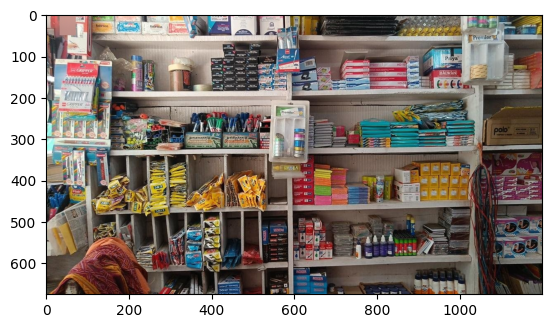

In [13]:
import matplotlib.pyplot as plt

plt.imshow(plt.imread(IMAGEDIR + '/IISc_VaaniProject_GENERIC_0602.jpg'))
plt.show()

In [7]:
engMETA.file_url.values

array(['https://vaani.iisc.ac.in/Audios/Rajnandgaon/IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_138471_12927452_BHBSBC_124341_8_10983.wav',
       'https://vaani.iisc.ac.in/Audios/Rajnandgaon/IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_138471_12927929_APATRI_67501_8_3569.wav',
       'https://vaani.iisc.ac.in/Audios/Rajnandgaon/IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_138471_12930806_CGBTSH_28932_8740_12720.wav',
       'https://vaani.iisc.ac.in/Audios/Rajnandgaon/IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_138471_12925170_UPVNSP_41970_8_10141.wav',
       'https://vaani.iisc.ac.in/Audios/Rajnandgaon/IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_138471_12932797_CGKDCO_226435_8_7661.wav',
       'https://vaani.iisc.ac.in/Audios/Rajnandgaon/IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_138471_12926171_BHBSMR_176702_0_5814.wav',
       'https://vaani.iisc.ac.in/Audios/Rajnandgaon/IISc_VaaniProject_S_Chhattisgarh_Rajnandgaon_138471_12930806_CGBTSH_28932_0_8355.wav',
       'https://va

<hr>
<hr>


In [9]:
metadf = pd.read_parquet(METADATA_PATH)
metadf

image_name 
 state 
 district 
 gender 
 audio_language 
 audio_name 
 
 
 
 
 0 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 Maharashtra 
 Aurangabad 
 female 
 Marathi 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 
 
 1 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 Maharashtra 
 Aurangabad 
 female 
 Marathi 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 
 
 2 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 Maharashtra 
 Aurangabad 
 female 
 Marathi 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 
 
 3 
 Images/IISc_VaaniProject_GENERIC_0073.jpg 
 Maharashtra 
 Aurangabad 
 female 
 Marathi 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 
 
 4 
 Images/IISc_VaaniProject_Aurangabad-SPECIFIC_0... 
 Maharashtra 
 Aurangabad 
 female 
 Marathi 
 Audios/Aurangabad/IISc_VaaniProject_S_Maharash... 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 9584927 
 Images/IISc_VaaniProject_GENERIC_0554.jpg 
 Karnataka 
 Chamarajanagar 
 female 
 Kannada 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 
 
 9584928 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 Karnataka 
 Chamarajanagar 
 female 
 Kannada 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 
 
 9584929 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 Karnataka 
 Chamarajanagar 
 female 
 Kannada 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 
 
 9584930 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 Karnataka 
 Chamarajanagar 
 female 
 Kannada 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 
 
 9584931 
 Images/IISc_VaaniProject_Chamrajnagar-SPECIFIC... 
 Karnataka 
 Chamarajanagar 
 female 
 Kannada 
 Audios/Chamrajn/IISc_VaaniProject_M_KA_Chamraj... 
 
 
 
 9584932 rows x 6 columns

In [3]:
engdf = metadf.loc[metadf.audio_language == 'English'].reset_index(drop=True)
engdf

image_name 
 state 
 district 
 gender 
 audio_language 
 audio_name 
 
 
 
 
 0 
 Images/IISc_VaaniProject_Gopalganj-SPECIFIC_00... 
 Bihar 
 Gopalganj 
 female 
 English 
 Audios/Gopalganj/IISc_VaaniProject_S_Bihar_Gop... 
 
 
 1 
 Images/IISc_VaaniProject_Gopalganj-SPECIFIC_00... 
 Bihar 
 Gopalganj 
 female 
 English 
 Audios/Gopalganj/IISc_VaaniProject_S_Bihar_Gop... 
 
 
 2 
 Images/IISc_VaaniProject_Gopalganj-SPECIFIC_00... 
 Bihar 
 Gopalganj 
 female 
 English 
 Audios/Gopalganj/IISc_VaaniProject_S_Bihar_Gop... 
 
 
 3 
 Images/IISc_VaaniProject_Gopalganj-SPECIFIC_00... 
 Bihar 
 Gopalganj 
 female 
 English 
 Audios/Gopalganj/IISc_VaaniProject_S_Bihar_Gop... 
 
 
 4 
 Images/IISc_VaaniProject_Gopalganj-SPECIFIC_00... 
 Bihar 
 Gopalganj 
 female 
 English 
 Audios/Gopalganj/IISc_VaaniProject_S_Bihar_Gop... 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 380938 
 Images/IISc_VaaniProject_GENERIC_0746.jpg 
 AndhraPradesh 
 Vishakapattanam 
 male 
 English 
 /Audios/Vishakapattanam/IISc_VaaniProject_S_AP... 
 
 
 380939 
 Images/IISc_VaaniProject_GENERIC_0793.jpg 
 AndhraPradesh 
 Vishakapattanam 
 male 
 English 
 /Audios/Vishakapattanam/IISc_VaaniProject_S_AP... 
 
 
 380940 
 Images/IISc_VaaniProject_GENERIC_0793.jpg 
 AndhraPradesh 
 Vishakapattanam 
 male 
 English 
 /Audios/Vishakapattanam/IISc_VaaniProject_S_AP... 
 
 
 380941 
 Images/IISc_VaaniProject_GENERIC_0008.jpg 
 AndhraPradesh 
 Vishakapattanam 
 female 
 English 
 /Audios/Vishakapattanam/IISc_VaaniProject_S_AP... 
 
 
 380942 
 Images/IISc_VaaniProject_GENERIC_0008.jpg 
 AndhraPradesh 
 Vishakapattanam 
 female 
 English 
 /Audios/Vishakapattanam/IISc_VaaniProject_S_AP... 
 
 
 
 380943 rows x 6 columns

In [5]:
engdf.duplicated(subset=['audio_name'], keep=False).value_counts()

False    380943
Name: count, dtype: int64

In [ ]:
engdf.audio_name.duplicated()

: 

In [6]:
audiocsv = pd.read_csv(AUDIO_CSV)
audiocsv

audio_path 
 referenceImage 
 gender 
 state 
 district 
 
 
 
 
 0 
 IISc_VaaniProject_S_AP_Guntur_66656_9672685_BH... 
 Images/IISc_VaaniProject_GENERIC_0746.jpg 
 Male 
 AndhraPradesh 
 Guntur 
 
 
 1 
 IISc_VaaniProject_S_AP_Guntur_66656_9672685_BH... 
 Images/IISc_VaaniProject_GENERIC_0746.jpg 
 Male 
 AndhraPradesh 
 Guntur 
 
 
 2 
 IISc_VaaniProject_S_AP_Guntur_66656_9672947_BH... 
 Images/IISc_VaaniProject_GENERIC_0905.jpg 
 Male 
 AndhraPradesh 
 Guntur 
 
 
 3 
 IISc_VaaniProject_S_AP_Guntur_66656_9672947_BH... 
 Images/IISc_VaaniProject_GENERIC_0905.jpg 
 Male 
 AndhraPradesh 
 Guntur 
 
 
 4 
 IISc_VaaniProject_S_AP_Guntur_66656_9672947_BH... 
 Images/IISc_VaaniProject_GENERIC_0905.jpg 
 Male 
 AndhraPradesh 
 Guntur 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 920 
 IISc_VaaniProject_S_Uttarpradesh_JyotibaPhuleN... 
 Images/IISc_VaaniProject_GENERIC_0761.jpg 
 Female 
 UttarPradesh 
 JyotibaPhuleNagar 
 
 
 921 
 IISc_VaaniProject_S_Uttarpradesh_JyotibaPhuleN... 
 Images/IISc_VaaniProject_JyotibaPhuleNagar-SPE... 
 Female 
 UttarPradesh 
 JyotibaPhuleNagar 
 
 
 922 
 IISc_VaaniProject_S_Uttarpradesh_JyotibaPhuleN... 
 Images/IISc_VaaniProject_JyotibaPhuleNagar-SPE... 
 Female 
 UttarPradesh 
 JyotibaPhuleNagar 
 
 
 923 
 IISc_VaaniProject_S_Uttarpradesh_JyotibaPhuleN... 
 Images/IISc_VaaniProject_JyotibaPhuleNagar-SPE... 
 Female 
 UttarPradesh 
 JyotibaPhuleNagar 
 
 
 924 
 IISc_VaaniProject_S_Uttarpradesh_JyotibaPhuleN... 
 Images/IISc_VaaniProject_JyotibaPhuleNagar-SPE... 
 Female 
 UttarPradesh 
 JyotibaPhuleNagar 
 
 
 
 925 rows x 5 columns

In [7]:
with open('/home/IITB/ai-at-ieor/23m1521/ashish/MTP/Vaani/audio_urls.txt', 'r') as audiourl, \
     open('/home/IITB/ai-at-ieor/23m1521/ashish/MTP/Vaani/images_urls.txt', 'r') as imgurl:
    print(audiourl.readlines()[:10])
    print(imgurl.readlines()[:10])

['https://vaani.iisc.ac.in/Audios/Aurangabad/IISc_VaaniProject_S_Maharashtra_Aurangabad_95220_10885658_MRACO_32387_0_10237.wav\n', 'https://vaani.iisc.ac.in/Audios/Aurangabad/IISc_VaaniProject_S_Maharashtra_Aurangabad_95220_10885688_MRACH_323525_10676_14796.wav\n', 'https://vaani.iisc.ac.in/Audios/Aurangabad/IISc_VaaniProject_S_Maharashtra_Aurangabad_95220_10885773_MRACS_92011_0_13216.wav\n', 'https://vaani.iisc.ac.in/Audios/Aurangabad/IISc_VaaniProject_S_Maharashtra_Aurangabad_95220_10885423_MRABC_323380_11266_20399.wav\n', 'https://vaani.iisc.ac.in/Audios/Aurangabad/IISc_VaaniProject_S_Maharashtra_Aurangabad_95220_10886492_MRACH_80994_515_9950.wav\n', 'https://vaani.iisc.ac.in/Audios/Aurangabad/IISc_VaaniProject_S_Maharashtra_Aurangabad_95220_10885712_MRACLT_323569_13981_21501.wav\n', 'https://vaani.iisc.ac.in/Audios/Aurangabad/IISc_VaaniProject_S_Maharashtra_Aurangabad_95220_10885688_MRACH_323525_0_5754.wav\n', 'https://vaani.iisc.ac.in/Audios/Aurangabad/IISc_VaaniProject_S_Maharash